In [22]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, uniform
import pandas as pd
from library import *

n_samples = 1000
n_runs = 100
a, b = 1, 10
N_VARIANCES = 500

In [23]:
f = lambda x: x**2
direct = np.zeros((n_samples, n_runs))
control = np.zeros((n_samples, n_runs))
impor = np.zeros((n_samples, n_runs))
strat = np.zeros((n_samples, n_runs))
anti = np.zeros((n_samples, n_runs))
for n in range(n_samples):
    for run in range(n_runs):
        direct[n, run] = direct_sampling(f, a, b, n+1)
        control[n, run] = control_variates(f, a, b, n+1)
        impor[n, run] = importance_sampling(f, a, b, n+1)
        strat[n, run] = stratified_sampling(f, a, b, n+1)
        anti[n, run] = antithetic_sampling(f, a, b, n+1)

direct_var = np.var(direct, axis=1)
control_var = np.var(control, axis=1)
impor_var = np.var(impor, axis=1)
strat_var = np.var(strat, axis=1)
anti_var = np.var(anti, axis=1)
        

/Users/alfonsomateos/Documents/PONTS/PAMS Project/Code/Sampling/../library.py:46: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = - np.cov(y, x)[0, 1] / np.var(x)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Fram

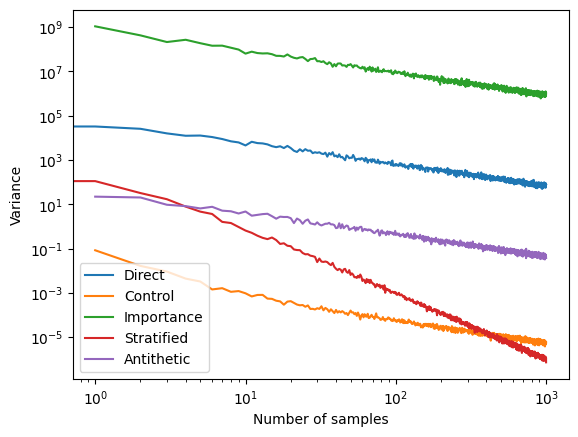

In [24]:
plt.figure()
plt.loglog(direct_var, label='Direct')
plt.loglog(control_var, label='Control')
plt.loglog(impor_var, label='Importance')
plt.loglog(strat_var, label='Stratified')
plt.loglog(anti_var, label='Antithetic')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Variance')
plt.show()